In [1]:
# the data
# https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

## importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
import re
import string
import pickle

from nltk.corpus import stopwords
import nltk
from nltk.stem import SnowballStemmer

## fetching the data

In [3]:
df = pd.read_csv('amazon_reviews_50k.csv')
df = df.drop('Unnamed: 0', axis=1)

#### some info about the data

In [4]:
display(df.head())
display(df.info())
display(df.describe())

,Unnamed: 0.1,Rating,Title,Review
0,0,4,Raspberries are Magic,Excellent family film for all ages! You can't ...
1,1,1,Road Warrior defeated in less than 1 year,I bought this battery for my wife's cell phone...
2,2,5,"Excellent advice, and very well written",I've read this book cover-to-cover twice as I ...
3,3,1,"Horrible, Horrible, Horrible!",The dialogue is so bad that you will feel dumb...
4,4,1,Don't get ripped off,Well...I have only one thing to say about this...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  50000 non-null  int64 
 1   Rating        50000 non-null  int64 
 2   Title         49996 non-null  object
 3   Review        50000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


None

,Unnamed: 0.1,Rating
count,50000.000000,50000.000000
mean,24999.500000,3.002800
std,14433.901067,1.415285
min,0.000000,1.000000
25%,12499.750000,2.000000
50%,24999.500000,3.000000
75%,37499.250000,4.000000
max,49999.000000,5.000000


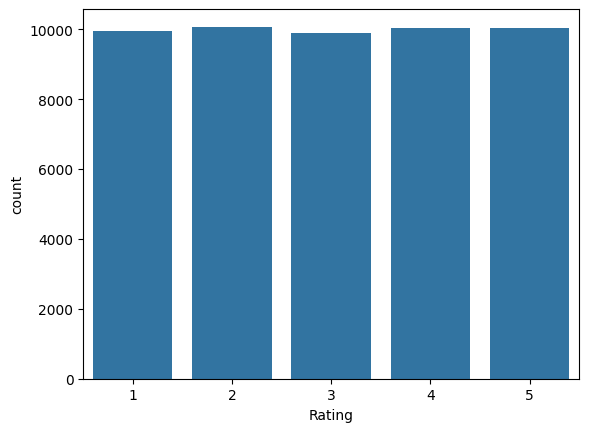

In [5]:
sns.barplot(df['Rating'].value_counts())
plt.show()

## NLP

##### first we will do some cleaining on a random sample and after we are done we will throw all of the data to the preprocessing functions

#### random sample

In [6]:
review = df['Review'][500]
rating = df['Rating'][500]
title = df['Title'][500]
print(title)
print(review)
print(rating)

Just OK
This book is an easy read, but each of the five love languages could be summed up in a page or two instead of a chapter each. Once you read what the languages are and think about them, you are done.
3


#### removing punktioations

In [7]:
text = re.sub('[^a-zA-Z]', ' ', review.lower())
print(text)

this book is an easy read  but each of the five love languages could be summed up in a page or two instead of a chapter each  once you read what the languages are and think about them  you are done 


#### tokenizing

In [8]:
tokenized = nltk.word_tokenize(text)
print(tokenized)

['this', 'book', 'is', 'an', 'easy', 'read', 'but', 'each', 'of', 'the', 'five', 'love', 'languages', 'could', 'be', 'summed', 'up', 'in', 'a', 'page', 'or', 'two', 'instead', 'of', 'a', 'chapter', 'each', 'once', 'you', 'read', 'what', 'the', 'languages', 'are', 'and', 'think', 'about', 'them', 'you', 'are', 'done']


#### removing stop words

In [9]:
extracted = [word for word in tokenized if word not in stopwords.words('english')]
print(extracted)

['book', 'easy', 'read', 'five', 'love', 'languages', 'could', 'summed', 'page', 'two', 'instead', 'chapter', 'read', 'languages', 'think', 'done']


#### stemming

In [10]:
stemmer = SnowballStemmer('english')

In [11]:
stemmed_words = [stemmer.stem(word) for word in extracted]
print(stemmed_words)

['book', 'easi', 'read', 'five', 'love', 'languag', 'could', 'sum', 'page', 'two', 'instead', 'chapter', 'read', 'languag', 'think', 'done']


#### rejoining the review inside of a string instead of a list

In [12]:
review = ' '.join(stemmed_words)
review

'book easi read five love languag could sum page two instead chapter read languag think done'

#### doing all steps to all of the data

In [13]:
def nlp_functions(content):
    review = re.sub('[^a-zA-Z]', ' ', content.lower())
    review = nltk.word_tokenize(review)
    review = [word for word in review if word not in stopwords.words('english')]
    review = [stemmer.stem(word) for word in review]
    review = ' '.join(review)
    return review

In [14]:
df['stemmed_content'] = df['Review'].apply(nlp_functions)

In [15]:
df.to_csv('clean_reviews_data_50k.csv', index=False)